In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
from nltk import bigrams
import itertools
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [32]:
# Read your CSV file
df = pd.read_csv('../data/phone_ratings_cleaned_final.csv')
df.head()

,product_id,comment,comment_clean,rating
0,honor-x8b,đừng mua không có linh kiện,đừng mua không_có linh_kiện,1
1,honor-x8b,máy sao cũng được ghét nhất cái zalo vui nó bá...,máy ghét_nhất zalo vui báo hiện gọi,3
2,honor-x8b,chiếc điện thoại mỏng nhất tôi từng dùng cũng ...,điện_thoại mỏng chip máy mượt,5
3,honor-x8b,sao hôm tôi mua lại không được tặng tai nghe n...,hôm mua không tặng tai_nghe giới_thiệu hôm đấy,4
4,honor-x8b,em mua được tuần trả lại mất bao nhiêu ạ,mua tuần trả bao_nhiêu,3


# 1. One Hot Encoding

In [33]:
comments = df['comment_clean'].astype(str).tolist()

In [34]:
comment_one_hot_encoding = comments

In [35]:

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(comment_one_hot_encoding)

In [36]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
vectorizer.get_feature_names_out()

array(['10', '100', '1000', ..., 'ủng_hộ', 'ứng_dụng', 'ứng_dụng_cụ_thể'],
      dtype=object)

In [38]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comment_one_hot_encoding)
df

,10,100,1000,1015,1080x2400,11,11040,11490,12,120,...,ổn_thể,ổn_trời,ổn_trừ,ổn_vân,ổn_áp,ổn_đơ,ổn_định,ủng_hộ,ứng_dụng,ứng_dụng_cụ_thể
đừng mua không_có linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét_nhất zalo vui báo hiện gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao_nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
camera tệ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thời_gian hiện_tượng giật_giật không cảm_ứng đổi sang máy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Count Vectorizing

In [39]:
comments_count_vectorizer = comments
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments_count_vectorizer)

In [40]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_count_vectorizer)
df

,10,100,1000,1015,1080x2400,11,11040,11490,12,120,...,ổn_thể,ổn_trời,ổn_trừ,ổn_vân,ổn_áp,ổn_đơ,ổn_định,ủng_hộ,ứng_dụng,ứng_dụng_cụ_thể
đừng mua không_có linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét_nhất zalo vui báo hiện gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao_nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
camera tệ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thời_gian hiện_tượng giật_giật không cảm_ứng đổi sang máy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3.N-grams

In [42]:
comments_n_grams = comments
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(comments_n_grams)

In [43]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_n_grams)
df

,10 không,10 selfie,10 tr,10 trieu,10 tắt,10 đêm,100 gb_liệu,100 quy_định,100 tư_vấn,1000 lan,...,ứng_dụng xóa_tải,ứng_dụng zalo,ứng_dụng ô_vuông,ứng_dụng đi,ứng_dụng điện_thoại,ứng_dụng đôi,ứng_dụng đơ,ứng_dụng đối_samsung,ứng_dụng đột_ngột,ứng_dụng_cụ_thể ứng_dụng
đừng mua không_có linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét_nhất zalo vui báo hiện gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao_nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
camera tệ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thời_gian hiện_tượng giật_giật không cảm_ứng đổi sang máy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.Co-occurrence Matrix

In [45]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

In [46]:
comments_occurence_matrix = comments
sentences_comments = [comment.split() for comment in comments_occurence_matrix]

In [47]:
merged = list(itertools.chain.from_iterable(sentences_comments))
matrix, vocab_to_index = co_occurrence_matrix(merged)
matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 4., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
CoMatrixFinal = pd.DataFrame(matrix, index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)

                 dụ  mail  đổi  thưa_nguyên  lươn_lẹo  hyperos  nhạy_ghê  \
dụ              0.0   0.0  0.0          0.0       0.0      0.0       0.0   
mail            0.0   0.0  0.0          0.0       0.0      0.0       0.0   
đổi             0.0   0.0  4.0          0.0       0.0      0.0       0.0   
thưa_nguyên     0.0   0.0  0.0          0.0       0.0      0.0       0.0   
lươn_lẹo        0.0   0.0  0.0          0.0       0.0      0.0       0.0   
...             ...   ...  ...          ...       ...      ...       ...   
chênh_giá       0.0   0.0  0.0          0.0       0.0      0.0       0.0   
chưa_được_loạn  0.0   0.0  0.0          0.0       0.0      0.0       0.0   
sim_sim         0.0   0.0  0.0          0.0       0.0      0.0       0.0   
nóng_sác        0.0   0.0  0.0          0.0       0.0      0.0       0.0   
mượt_màn        0.0   0.0  0.0          0.0       0.0      0.0       0.0   

                phết    đ  đồng_nhân_viên  ...  cảnh   re  ổn_hao  \
dụ               0

#5 Hash Vectorizing

In [49]:
comments_hash_vectorizer = comments

In [50]:
vectorizer = HashingVectorizer(n_features=5)
X = vectorizer.fit_transform(comments_hash_vectorizer)

print(X.toarray())

[[ 0.         -0.40824829  0.          0.81649658 -0.40824829]
 [ 0.          0.66666667  0.          0.33333333  0.66666667]
 [ 0.         -0.37796447  0.37796447 -0.37796447  0.75592895]
 ...
 [-0.19611614  0.39223227  0.19611614  0.78446454  0.39223227]
 [-0.35355339 -0.35355339  0.70710678 -0.35355339  0.35355339]
 [-0.57735027  0.57735027  0.          0.          0.57735027]]


# TF-IDF

In [51]:
comment_tf_idf = comments

In [52]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comment_tf_idf)


In [53]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comment_tf_idf)
df

,10,100,1000,1015,1080x2400,11,11040,11490,12,120,...,ổn_thể,ổn_trời,ổn_trừ,ổn_vân,ổn_áp,ổn_đơ,ổn_định,ủng_hộ,ứng_dụng,ứng_dụng_cụ_thể
đừng mua không_có linh_kiện,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
máy ghét_nhất zalo vui báo hiện gọi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
điện_thoại mỏng chip máy mượt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mua tuần trả bao_nhiêu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
camera tệ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thời_gian hiện_tượng giật_giật không cảm_ứng đổi sang máy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Skip-Gram

In [54]:
# training the model
# sg = 1, skipgarm, sg = 0, cbow
skipgram = Word2Vec(sentences_comments,vector_size=50, window= 3, min_count=1, sg= 1)

In [55]:
print(skipgram)

Word2Vec<vocab=3631, vector_size=50, alpha=0.025>


In [56]:
# access vector for one word
skipgram.wv['hỏng']

array([ 0.030654  , -0.0589818 , -0.1825128 ,  0.14208221, -0.11010356,
       -0.15735677,  0.13904113,  0.41804054, -0.26308647, -0.06394672,
        0.00045657, -0.23010421, -0.00364854,  0.1465165 , -0.10265369,
        0.16011706,  0.2290088 , -0.00869287, -0.31556457, -0.25842735,
        0.03883661,  0.20439228,  0.37064403, -0.2509757 ,  0.26210487,
       -0.0250254 , -0.1449346 , -0.0858468 , -0.32887957,  0.15288727,
        0.0100274 , -0.08492024,  0.01708508, -0.02384352, -0.09601633,
        0.19371836,  0.2031775 , -0.03107736,  0.06649089, -0.17821255,
        0.20275106, -0.03327509, -0.02474098,  0.08349212,  0.3441132 ,
       -0.07479816, -0.03399455, -0.17860755,  0.06767523,  0.22541642],
      dtype=float32)

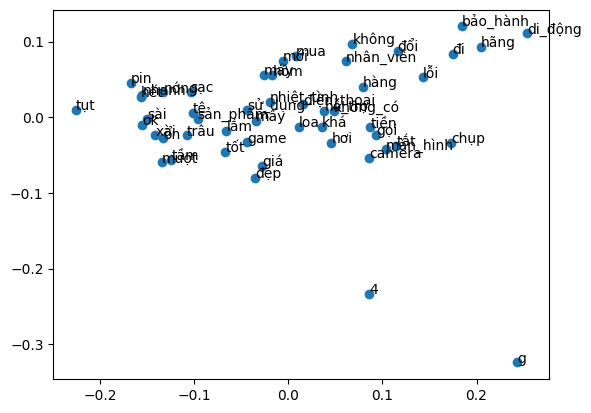

In [57]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')
# T -SNE plot í one of the way to evaluate word embedding
X = skipgram.wv[skipgram.wv.index_to_key]
X_subset = X[:50]
pca = PCA(n_components=2)
result = pca.fit_transform(X_subset)
pyplot.scatter(result[:,0], result[:,1])
words = list(skipgram.wv.index_to_key)

words_to_plot = words[:50]  # Plot only the first 100 words


for i, word in enumerate(words_to_plot):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Continuos Bag of Word ( CBOW )

In [58]:
# training the model
cbow = Word2Vec(sentences_comments,vector_size=50, window= 3, min_count=1, sg= 0)
print(cbow)

Word2Vec<vocab=3631, vector_size=50, alpha=0.025>


In [59]:
cbow.wv['hỏng']

array([-0.01747509, -0.00593754, -0.03672792,  0.04827723, -0.02608994,
       -0.1267994 ,  0.10269202,  0.20851538, -0.20768258, -0.0449419 ,
        0.01944076, -0.20715483,  0.06817984,  0.12772468, -0.08335868,
        0.02394634,  0.07754289,  0.02484785, -0.14856924, -0.10720956,
        0.07260322,  0.06447949,  0.19425984, -0.07313696,  0.09016133,
       -0.01126077, -0.06061867, -0.05641772, -0.12457563,  0.05953626,
        0.03919126, -0.08019048, -0.01737297, -0.03130937, -0.08211549,
        0.09891823,  0.15162292,  0.01276063,  0.04167634, -0.10258527,
        0.09229483, -0.02235035, -0.02751824,  0.0498206 ,  0.19203362,
       -0.05788442, -0.02041394, -0.11631591,  0.04278635,  0.07583553],
      dtype=float32)

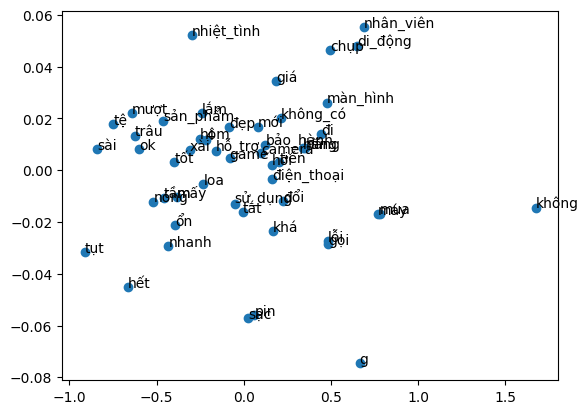

In [60]:
# save model
cbow.save('cbow.bin')
# load model
cbow = Word2Vec.load('cbow.bin')
# T-SNE plot - to evaluate word embedding
X = cbow.wv[cbow.wv.index_to_key]
X_subset = X[:50]

pca = PCA(n_components=2)
result = pca.fit_transform(X_subset)
pyplot.scatter(result[:,0], result[:,1])

words = list(cbow.wv.index_to_key)
words_to_plot = words[:50]

for i, word in enumerate(words_to_plot):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()